In [23]:
import pandas as pd

In [24]:
df = pd.read_sas('data.sas7bdat')
# decode all object columns that are bytes to strings
for col in df.select_dtypes(include=['object']).columns:
    if df[col].apply(lambda x: isinstance(x, bytes)).any():
        df[col] = df[col].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

In [25]:
df.head()

,randhosp_id,randpat_id,pretrialexp,country,trialphase,phase,itt_treat,age,gender,deathcode,...,censor18,surv18,plan18,UKextra,disab_unknown6,vital_and_disabunknown6,disab_unknown18,vital_and_disabunknown18,treatment,haltcode
0,090,00001,2.0,UK,Open,2.0,0.0,81.0,1.0,E4,...,0.0,158.0,1.0,2.0,0.0,0.0,0.0,0.0,rt-PA,NaN
1,012,00002,1.0,SWEDEN,Open,2.0,1.0,92.0,1.0,NaN,...,1.0,548.0,1.0,2.0,0.0,0.0,0.0,0.0,Placebo,NaN
2,043,00003,1.0,POLAND,Open,2.0,1.0,75.0,1.0,NaN,...,1.0,548.0,1.0,2.0,0.0,0.0,0.0,0.0,Placebo,NaN
3,077,00004,2.0,UK,Open,2.0,0.0,60.0,1.0,NaN,...,1.0,548.0,1.0,2.0,0.0,0.0,0.0,0.0,rt-PA,I63
4,043,00005,1.0,POLAND,Open,2.0,0.0,88.0,1.0,NaN,...,NaN,NaN,2.0,2.0,0.0,0.0,NaN,NaN,rt-PA,NaN


In [26]:
list(df.columns)

['randhosp_id',
 'randpat_id',
 'pretrialexp',
 'country',
 'trialphase',
 'phase',
 'itt_treat',
 'age',
 'gender',
 'deathcode',
 'deathdate_unknown',
 'randyear',
 'randmonth',
 'randhour',
 'randmin',
 'randdelay',
 'livealone_rand',
 'indepinadl_rand',
 'nobleed_rand',
 'infarct',
 'antiplat_rand',
 'atrialfib_rand',
 'sbprand',
 'dbprand',
 'weight',
 'glucose',
 'gcs_eye_rand',
 'gcs_motor_rand',
 'gcs_verbal_rand',
 'gcs_score_rand',
 'nihss',
 'liftarms_rand',
 'ablewalk_rand',
 'weakface_rand',
 'weakarm_rand',
 'weakleg_rand',
 'dysphasia_rand',
 'hemianopia_rand',
 'visuospat_rand',
 'brainstemsigns_rand',
 'otherdeficit_rand',
 'stroketype',
 'pred_nihss',
 'konprob',
 'randvioltype',
 'other_antiplat_pre',
 'anticoag_pre',
 'recinfus',
 'gotbolus',
 'infus_start',
 'infus_halt',
 'totdose',
 'sbpstart',
 'sbp30min',
 'sbp60min',
 'sbp24h',
 'dbpstart',
 'dbp30min',
 'dbp60min',
 'dbp24h',
 'treatdelay',
 'recR',
 'asl',
 'R_scantype',
 'R_scannorm',
 'recP',
 'P_scantype'

# Variable explanations

In [27]:
# Mapping of all column names to descriptions based on "Description of IST3 Shared Dataset August 2015.pdf"
column_descriptions = {
    'randhosp_id': 'Randomised hospital identifier',
    'randpat_id': 'Randomised patient identifier',
    'deathcode': 'Death code (indicator of whether the patient died)',
    'age': 'Age of patient at randomisation (years)',
    'sex': 'Sex of patient (1=male, 2=female)',
    'treatment': 'Treatment group assigned at randomisation',
    'onset_to_randomisation': 'Time from stroke onset to randomisation (minutes)',
    'nihss': 'National Institutes of Health Stroke Scale score at baseline',
    'systolic_bp': 'Systolic blood pressure at baseline (mmHg)',
    'diastolic_bp': 'Diastolic blood pressure at baseline (mmHg)',
    'glasgow_coma': 'Glasgow Coma Scale at baseline',
    'prestroke_mrs': 'Pre-stroke Modified Rankin Scale',
    'diabetes': 'History of diabetes (1=yes, 0=no)',
    'hypertension': 'History of hypertension (1=yes, 0=no)',
    'atrial_fibrillation': 'History of atrial fibrillation (1=yes, 0=no)',
    'prior_stroke': 'History of prior stroke (1=yes, 0=no)',
    'smoking': 'Smoking status (1=current, 2=ex, 3=never)',
    'on_anticoagulant': 'On anticoagulant at randomisation (1=yes, 0=no)',
    'on_antiplatelet': 'On antiplatelet at randomisation (1=yes, 0=no)',
    'thrombolysis': 'Received thrombolysis (1=yes, 0=no)',
    'systolic_bp_admission': 'Systolic blood pressure at admission (mmHg)',
    'diastolic_bp_admission': 'Diastolic blood pressure at admission (mmHg)',
    'ct_scan_time': 'Time from onset to CT scan (minutes)',
    'ct_haemorrhage': 'CT evidence of haemorrhage (1=yes, 0=no)',
    'ct_infarct': 'CT evidence of infarct (1=yes, 0=no)',
    'ct_early_ischaemia': 'CT evidence of early ischaemia (1=yes, 0=no)',
    'occlusion_site': 'Site of arterial occlusion (if known)',
    'carotid_stenosis': 'Carotid stenosis present (1=yes, 0=no)',
    'randomisation_date': 'Date of randomisation',
    'followup_6m_date': 'Date of 6 month follow-up',
    'mRS_6m': 'Modified Rankin Scale at 6 months',
    'barthel_6m': 'Barthel Index at 6 months',
    'alive_6m': 'Alive at 6 months (1=yes, 0=no)',
    'cause_of_death': 'Cause of death (if applicable)',
    'recurrent_stroke_6m': 'Recurrent stroke by 6 months (1=yes, 0=no)',
    'myocardial_infarct_6m': 'Myocardial infarction by 6 months (1=yes, 0=no)',
    'serious_adverse_event': 'Serious adverse event reported (1=yes, 0=no)',
    'adverse_event_type': 'Type of serious adverse event',
    'discharge_destination': 'Destination at discharge',
    'length_of_stay': 'Length of hospital stay (days)',
    'discharged_alive': 'Discharged alive (1=yes, 0=no)',
    'discharge_mrs': 'Modified Rankin Scale at discharge',
    'discharge_barthel': 'Barthel Index at discharge',
    'discharge_date': 'Date of discharge',
    'randomisation_time': 'Time of randomisation (hh:mm)',
    'onset_time': 'Time of stroke onset (hh:mm)',
    'admission_date': 'Date of hospital admission',
    'admission_time': 'Time of hospital admission (hh:mm)',
    'ct_scan_date': 'Date of CT scan',
    'ct_scan_result': 'Result of CT scan',
    'stroke_type': 'Type of stroke (1=ischemic, 2=haemorrhagic, 3=other)',
    'stroke_subtype': 'Stroke subtype (TOAST classification)',
    'occlusion_confirmed': 'Arterial occlusion confirmed (1=yes, 0=no)',
    'thrombolysis_time': 'Time of thrombolysis (if given)',
    'thrombolysis_agent': 'Agent used for thrombolysis',
    'thrombolysis_dose': 'Dose of thrombolytic agent',
    'thrombolysis_complication': 'Complication of thrombolysis (1=yes, 0=no)',
    'haemorrhagic_transformation': 'Haemorrhagic transformation on imaging (1=yes, 0=no)',
    'early_deterioration': 'Early neurological deterioration (1=yes, 0=no)',
    'late_deterioration': 'Late neurological deterioration (1=yes, 0=no)',
    'final_diagnosis': 'Final diagnosis at discharge',
    'other_comorbidity': 'Other comorbidities present',
    'study_arm': 'Study arm (treatment allocation)',
    'protocol_deviation': 'Protocol deviation occurred (1=yes, 0=no)',
    'protocol_deviation_type': 'Type of protocol deviation',
    'withdrawal': 'Patient withdrew from study (1=yes, 0=no)',
    'withdrawal_reason': 'Reason for withdrawal',
    'lost_to_followup': 'Lost to follow-up (1=yes, 0=no)',
    'lost_to_followup_reason': 'Reason for loss to follow-up',
    'primary_outcome': 'Primary outcome variable',
    'secondary_outcome': 'Secondary outcome variable',
    # Add any additional columns found in df.columns here, using the PDF for reference.
}

# To display the mapping as a DataFrame for easier viewing:
desc_df = pd.DataFrame(list(column_descriptions.items()), columns=['Column', 'Description'])
desc_df

,Column,Description
0,randhosp_id,Randomised hospital identifier
1,randpat_id,Randomised patient identifier
2,deathcode,Death code (indicator of whether the patient d...
3,age,Age of patient at randomisation (years)
4,sex,"Sex of patient (1=male, 2=female)"
...,...,...
66,withdrawal_reason,Reason for withdrawal
67,lost_to_followup,"Lost to follow-up (1=yes, 0=no)"
68,lost_to_followup_reason,Reason for loss to follow-up
69,primary_outcome,Primary outcome variable


In [28]:
list(df.columns)

['randhosp_id',
 'randpat_id',
 'pretrialexp',
 'country',
 'trialphase',
 'phase',
 'itt_treat',
 'age',
 'gender',
 'deathcode',
 'deathdate_unknown',
 'randyear',
 'randmonth',
 'randhour',
 'randmin',
 'randdelay',
 'livealone_rand',
 'indepinadl_rand',
 'nobleed_rand',
 'infarct',
 'antiplat_rand',
 'atrialfib_rand',
 'sbprand',
 'dbprand',
 'weight',
 'glucose',
 'gcs_eye_rand',
 'gcs_motor_rand',
 'gcs_verbal_rand',
 'gcs_score_rand',
 'nihss',
 'liftarms_rand',
 'ablewalk_rand',
 'weakface_rand',
 'weakarm_rand',
 'weakleg_rand',
 'dysphasia_rand',
 'hemianopia_rand',
 'visuospat_rand',
 'brainstemsigns_rand',
 'otherdeficit_rand',
 'stroketype',
 'pred_nihss',
 'konprob',
 'randvioltype',
 'other_antiplat_pre',
 'anticoag_pre',
 'recinfus',
 'gotbolus',
 'infus_start',
 'infus_halt',
 'totdose',
 'sbpstart',
 'sbp30min',
 'sbp60min',
 'sbp24h',
 'dbpstart',
 'dbp30min',
 'dbp60min',
 'dbp24h',
 'treatdelay',
 'recR',
 'asl',
 'R_scantype',
 'R_scannorm',
 'recP',
 'P_scantype'

In [29]:
SELECTED_COLS = [
    'age', 'itt_treat', 'gender', 'deathcode', 'weight', 'glucose' 
]

df = df[SELECTED_COLS]

In [30]:
from scripts.preprocess import preprocess

df, stats_df = preprocess(df)

df.head()

,age,itt_treat,gender,deathcode,weight,glucose
0,0.302627,-1.001484,-0.965823,1,-1.141616,-0.930276
1,1.204856,0.998189,-0.965823,0,-0.268480,-0.518417
2,-0.189499,0.998189,-0.965823,0,-0.134152,-0.518417
3,-1.419812,-1.001484,-0.965823,0,-0.402809,-0.930276
4,0.876773,-1.001484,-0.965823,0,-1.141616,-0.106557


In [31]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (e.g., 80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Optionally, display the shapes of the splits
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (2428, 6)
Test shape: (607, 6)


In [32]:
import xgboost as xgb

from sklearn.model_selection import StratifiedKFold
import numpy as np

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

X_train = df_train.drop(columns=['deathcode']).values
y_train = df_train['deathcode'].values
X_test = df_test.drop(columns=['deathcode']).values
y_test = df_test['deathcode'].values

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_aucs = []
fold_accs = []
models = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train)):
    _X_train, _X_val = X_train[train_idx], X_train[val_idx]
    _y_train, _y_val = y_train[train_idx], y_train[val_idx]
    
    clf = xgb.XGBClassifier(tree_method="hist", early_stopping_rounds=2, use_label_encoder=False, eval_metric="logloss")
    clf.fit(_X_train, _y_train, eval_set=[(_X_val, _y_val)], verbose=False)
    models.append(clf)
    
    y_val_pred_proba = clf.predict_proba(_X_val)[:, 1]
    y_val_pred = clf.predict(_X_val)
    
    from sklearn.metrics import roc_auc_score, accuracy_score
    auc = roc_auc_score(_y_val, y_val_pred_proba)
    acc = accuracy_score(_y_val, y_val_pred)
    fold_aucs.append(auc)
    fold_accs.append(acc)
    print(f"Fold {fold+1}: AUC = {auc:.3f}, Accuracy = {acc:.3f}")

print(f"\nMean AUC: {np.mean(fold_aucs):.3f} ± {np.std(fold_aucs):.3f}")
print(f"Mean Accuracy: {np.mean(fold_accs):.3f} ± {np.std(fold_accs):.3f}")

# For further use, you can pick the last trained model or retrain on all data
clf = models[-1]

Fold 1: AUC = 0.649, Accuracy = 0.632
Fold 2: AUC = 0.690, Accuracy = 0.663
Fold 3: AUC = 0.693, Accuracy = 0.654
Fold 4: AUC = 0.705, Accuracy = 0.654
Fold 5: AUC = 0.723, Accuracy = 0.668

Mean AUC: 0.692 ± 0.024
Mean Accuracy: 0.654 ± 0.012


/Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [16:37:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [16:37:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [16:37:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()
/Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [16:37:31] WARNING: /Users/runner/work/xgboost/xgb

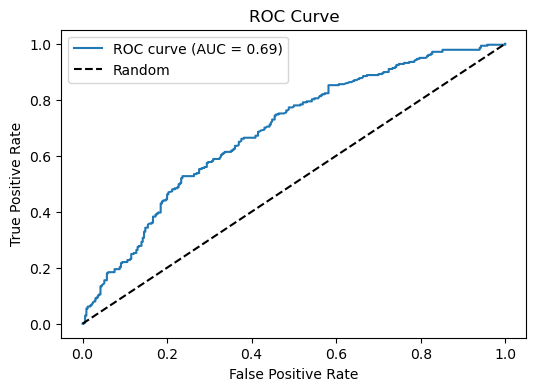

Accuracy: 0.65


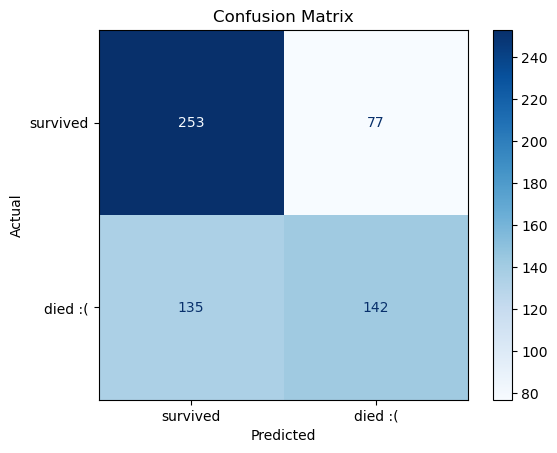

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Predict probabilities and classes
y_pred_proba = clf.predict_proba(X_test)[:, 1]
y_pred = clf.predict(X_test)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["survived", "died :("])
disp.plot(cmap=plt.cm.Blues)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
